<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Demographics-Visualization" data-toc-modified-id="Demographics-Visualization-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Demographics Visualization</a></span></li><li><span><a href="#Ethnicity-and-Race-Visualziation" data-toc-modified-id="Ethnicity-and-Race-Visualziation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Ethnicity and Race Visualziation</a></span></li><li><span><a href="#Feeding-Type-Visualization" data-toc-modified-id="Feeding-Type-Visualization-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Feeding Type Visualization</a></span></li><li><span><a href="#Transforming-Feeding-Type-Data" data-toc-modified-id="Transforming-Feeding-Type-Data-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Transforming Feeding Type Data</a></span></li><li><span><a href="#Initial-Feeding-Visualization" data-toc-modified-id="Initial-Feeding-Visualization-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Initial Feeding Visualization</a></span></li></ul></li></ul></li><li><span><a href="#Initial-Feeding-ECDF" data-toc-modified-id="Initial-Feeding-ECDF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Initial Feeding ECDF</a></span></li></ul></div>

# Data Exploration Breast Feeding Data
Analysis done by: Brian Naoe
Contact Email: bp.naoe@me.com

A short data analysis for breast feeding data to gain statistical insights.  

<a id='Overview'></a>
## Overview

Early initiation of breastfeeding, within one hour of birth is recommended by WHO. Although it is one of the core indicators for assessing infant and young child feeding practices, it is a far from universal practice. Data from 2002-2005 show that 46 low- and middle-income countries (LMIC) had included early initiation of breastfeeding in Demographic Health Surveys. Of these, 54% recorded that less than half of all new-borns were put to the breast within an hour of birth. Furthermore, no country had more than 80% of babies breastfeeding within an hour of birth. Global estimates are that less than half (42%) of all newborns are put to the breast within the first hour of birth.

Reference: Shrimpton, R. (2017).Early initiation of breastfeeding. Retrieved from https://www.who.int/elena/titles/commentary/early_breastfeeding/en/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Exploration

A 2017 data have been used for this data analysis. The data contains information about the breast feeding events during the mother's admission.

In [2]:
raw_data = pd.read_csv('Breast_feed.csv')
df = raw_data.copy()
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,pid,event_dt_tm,newborn_feeding_type,infant_breast_fed,audible_swallow,breast_hold_asst,birth_to_event_hrs,FEEDING_IO,birth_to_event_hrs_io,breast_feed_lot,birth_to_event_hrs_breast_feed,race,ethnicity,gestation,delivery,brith_wt_kg
0,1716071,6/6/2017 8:53,Breast milk,NaN,NaN,NaN,0.767,NaN,NaN,NaN,NaN,White,Hispanic/Latino,37.0,Vaginal,2.805
1,1716071,6/6/2017 9:21,Breast milk,NaN,NaN,NaN,1.233,NaN,NaN,NaN,NaN,White,Hispanic/Latino,37.0,Vaginal,2.805
2,1716071,6/6/2017 14:40,Breast milk,NaN,NaN,NaN,6.550,NaN,NaN,NaN,NaN,White,Hispanic/Latino,37.0,Vaginal,2.805
3,1716071,6/7/2017 9:30,Breast milk,NaN,NaN,NaN,25.383,NaN,NaN,NaN,NaN,White,Hispanic/Latino,37.0,Vaginal,2.805
4,1716071,6/7/2017 12:00,Breast milk,NaN,NaN,NaN,27.883,NaN,NaN,NaN,NaN,White,Hispanic/Latino,37.0,Vaginal,2.805


## Data Preprocessing
Grouped rows with the same event date and time for the the same encounter. Each encounter has multiple rows for multiple breast feeding events during the admission.

In [3]:
df_group = df.groupby(['pid','event_dt_tm']).first().reset_index()
df_group.head()

,pid,event_dt_tm,newborn_feeding_type,infant_breast_fed,audible_swallow,breast_hold_asst,birth_to_event_hrs,FEEDING_IO,birth_to_event_hrs_io,breast_feed_lot,birth_to_event_hrs_breast_feed,race,ethnicity,gestation,delivery,brith_wt_kg
0,1026855,9/17/2017 10:30,"Breast milk, Other: cup fed 10 ml 5% glucose w...",Yes,No audible swallowing,Full assistance,10.50,10.0,10.5,5,10.50,White,Hispanic/Latino,NaN,NaN,2.745
1,1026855,9/17/2017 13:45,Breast milk,NaN,No audible swallowing,Full assistance,13.75,NaN,NaN,10,13.75,White,Hispanic/Latino,NaN,NaN,2.745
2,1026855,9/17/2017 14:00,NaN,Yes,With stimulation some audible swallowing,Min Assist,NaN,NaN,NaN,5,14.00,White,Hispanic/Latino,NaN,NaN,2.745
3,1026855,9/17/2017 17:00,Breast milk,NaN,Spontaneous and intermittent,Min Assist,17.00,NaN,NaN,15,17.00,White,Hispanic/Latino,NaN,NaN,2.745
4,1026855,9/17/2017 19:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,19.50,White,Hispanic/Latino,NaN,NaN,2.745


In [4]:
#Investigating the null values
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53559 entries, 0 to 53558
Data columns (total 16 columns):
pid                               53559 non-null int64
event_dt_tm                       53559 non-null object
newborn_feeding_type              35999 non-null object
infant_breast_fed                 794 non-null object
audible_swallow                   6374 non-null object
breast_hold_asst                  6544 non-null object
birth_to_event_hrs                35989 non-null float64
FEEDING_IO                        29262 non-null float64
birth_to_event_hrs_io             29262 non-null float64
breast_feed_lot                   13536 non-null object
birth_to_event_hrs_breast_feed    13529 non-null float64
race                              53511 non-null object
ethnicity                         53559 non-null object
gestation                         24575 non-null float64
delivery                          25457 non-null object
brith_wt_kg                       53559 non-null fl

### Data Visualization

#### Demographics Visualization

In [5]:
df_group_mrn = df.groupby('pid').first().reset_index()
df_group_mrn.head()

,pid,event_dt_tm,newborn_feeding_type,infant_breast_fed,audible_swallow,breast_hold_asst,birth_to_event_hrs,FEEDING_IO,birth_to_event_hrs_io,breast_feed_lot,birth_to_event_hrs_breast_feed,race,ethnicity,gestation,delivery,brith_wt_kg
0,1026855,9/17/2017 13:45,Breast milk,Yes,No audible swallowing,Full assistance,13.750,10.0,10.500,5,10.500,White,Hispanic/Latino,NaN,NaN,2.745
1,1702957,1/6/2017 20:21,Breast milk,NaN,Spontaneous and intermittent,Min Assist,140.350,30.0,32.250,15,36.000,White,Hispanic/Latino,NaN,NaN,3.635
2,1702974,1/1/2017 14:08,Breast milk,NaN,Spontaneous and frequent,No assistance from staff,14.133,15.0,23.833,20,19.000,White,Hispanic/Latino,39.0,Vaginal,3.625
3,1702975,1/2/2017 15:40,Breast milk,Yes,With stimulation some audible swallowing,Min Assist,39.667,30.0,18.933,5,39.667,Other,Non-Hispanic/Latino,NaN,NaN,3.455
4,1702978,1/1/2017 19:00,Breast milk,NaN,With stimulation some audible swallowing,Staff initially holds then the mother,19.000,15.0,42.500,10,19.000,Asian,Non-Hispanic/Latino,NaN,NaN,2.995


#### Ethnicity and Race Visualziation

In [6]:
df_ethnicity = df_group_mrn[['ethnicity','race']]
df_ethnicity.head()

,ethnicity,race
0,Hispanic/Latino,White
1,Hispanic/Latino,White
2,Hispanic/Latino,White
3,Non-Hispanic/Latino,Other
4,Non-Hispanic/Latino,Asian


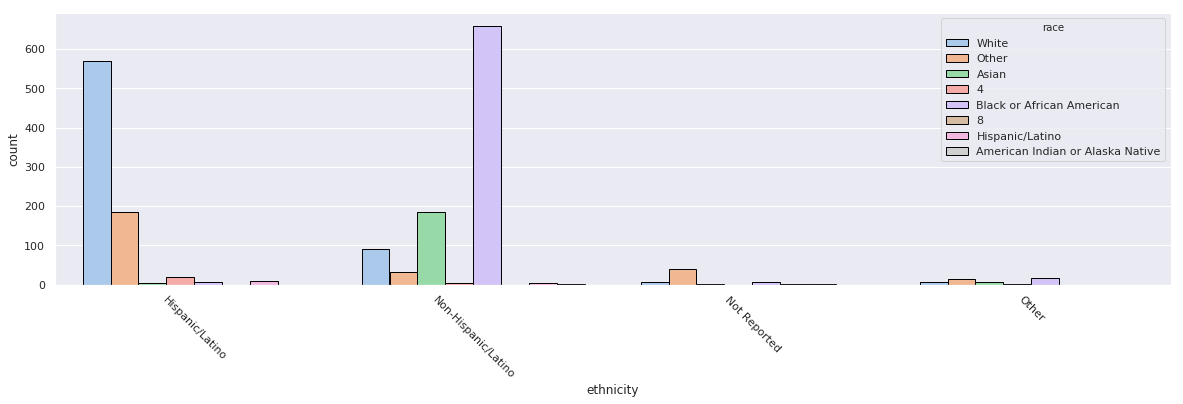

In [7]:
# looking at ethnicity and race population
plt.figure(figsize=(20,5))
sns.countplot(x='ethnicity', hue='race', data=df_ethnicity, edgecolor=(0,0,0), palette='pastel')
# Rotate
plt.xticks(rotation=-45)
plt.show()

#### Feeding Type Visualization

In [ ]:
# looking at unique values for feeding type
df_group['newborn_feeding_type'].unique()

In [9]:
df_group['newborn_feeding_type'].count()

35999

#### Transforming Feeding Type Data 
There are too many re-occuring unique values for feeding time that can be transformed into several feeding types. This due to users documenting different feeding types that mothers take during feeding.   

In [10]:
dic = {'Breast milk, Formula,':'Breast milk, Formula','Breast milk, Other:':'Breast milk','Fortified breast milk, Other:':'Fortified breast milk',
      'Formula, Fortified breast milk, Other:':'Formula, Fortified breast milk','SIMILAC':'Similac', 'Formula, Other:':'Formula', 'Other':'Other'}

df_feed = df_group.copy()

for k, v in dic.items():
    df_feed['newborn_feeding_type'] = np.where(df_feed['newborn_feeding_type'].str.contains(k, case=False),v, df_feed['newborn_feeding_type'])    
    
df_unique_feed = df_feed['newborn_feeding_type'].value_counts()
df_unique_feed = df_unique_feed.rename_axis('unique_values').reset_index(name='counts')
df_unique_feed

,unique_values,counts
0,"Breast milk, Formula",20236
1,Formula,19121
2,Breast milk,12145
3,Fortified breast milk,1673
4,Similac,258
5,Other,80
6,"Formula, Fortified breast milk",24
7,"Breast milk, Fortified breast milk",14
8,D5W,7
9,"D5W, Formula",1


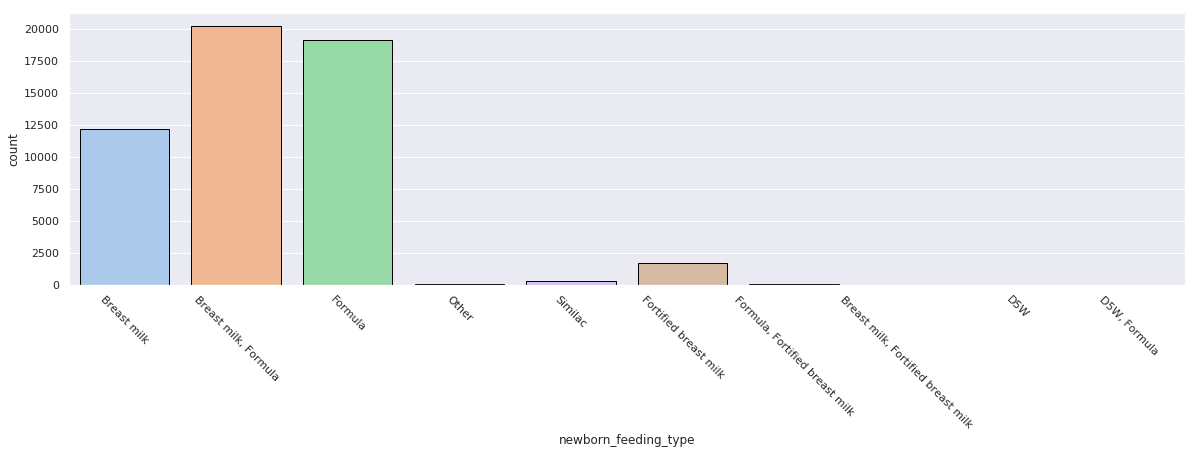

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(x='newborn_feeding_type', data=df_feed, edgecolor=(0,0,0), palette='pastel')
# Rotate xticks
plt.xticks(rotation=-45)
plt.show()

#### Initial Feeding Visualization
We want to see what percentage of the patient population are feeding with in 1 hour after birth.

In [12]:
# Transformed the index to have a multi-index using pid and event_dt_tm to get the initial feeding event dt tm
df_sort_feed = df_feed.copy()
df_sort_feed['event_dt_tm'] = pd.to_datetime(df_sort_feed['event_dt_tm'])
df_sort_feed.set_index(['pid','event_dt_tm'], drop=True, append=False, inplace=True, verify_integrity=False)
df_sort_feed = df_sort_feed.sort_index()
df_sort_feed.head()

newborn_feeding_type infant_breast_fed  \
pid     event_dt_tm                                                   
1026855 2017-09-17 10:30:00           Breast milk               Yes   
        2017-09-17 13:45:00           Breast milk               NaN   
        2017-09-17 14:00:00  Breast milk, Formula               Yes   
        2017-09-17 17:00:00           Breast milk               NaN   
        2017-09-17 19:30:00  Breast milk, Formula               NaN   

                                                      audible_swallow  \
pid     event_dt_tm                                                     
1026855 2017-09-17 10:30:00                     No audible swallowing   
        2017-09-17 13:45:00                     No audible swallowing   
        2017-09-17 14:00:00  With stimulation some audible swallowing   
        2017-09-17 17:00:00              Spontaneous and intermittent   
        2017-09-17 19:30:00                                       NaN   

                            breast_hold_asst  birth_to_event_hrs  FEEDING_IO  \
pid     event_dt_tm                                                            
1026855 2017-09-17 10:30:00  Full assistance               10.50        10.0   
        2017-09-17 13:45:00  Full assistance               13.75         NaN   
        2017-09-17 14:00:00       Min Assist                 NaN         NaN   
        2017-09-17 17:00:00       Min Assist               17.00         NaN   
        2017-09-17 19:30:00              NaN                 NaN         NaN   

                             birth_to_event_hrs_io breast_feed_lot  \
pid     event_dt_tm                                                  
1026855 2017-09-17 10:30:00                   10.5               5   
        2017-09-17 13:45:00                    NaN              10   
        2017-09-17 14:00:00                    NaN               5   
        2017-09-17 17:00:00                    NaN              15   
        2017-09-17 19:30:00                    NaN              20   

                             birth_to_event_hrs_breast_feed   race  \
pid     event_dt_tm                                                  
1026855 2017-09-17 10:30:00                           10.50  White   
        2017-09-17 13:45:00                           13.75  White   
        2017-09-17 14:00:00                           14.00  White   
        2017-09-17 17:00:00                           17.00  White   
        2017-09-17 19:30:00                           19.50  White   

                                   ethnicity  gestation delivery  brith_wt_kg  
pid     event_dt_tm                                                            
1026855 2017-09-17 10:30:00  Hispanic/Latino        NaN      NaN        2.745  
        2017-09-17 13:45:00  Hispanic/Latino        NaN      NaN        2.745  
        2017-09-17 14:00:00  Hispanic/Latino        NaN      NaN        2.745  
        2017-09-17 17:00:00  Hispanic/Latino        NaN      NaN        2.745  
        2017-09-17 19:30:00  Hispanic/Latino        NaN      NaN        2.745

In [13]:
# grouped rows and took the 1st row to isolate the first feeding per newborn.
df_first_feed = df_sort_feed.groupby(level=0).apply(lambda x: x.iloc[0:1])
df_first_feed.index = df_first_feed.index.droplevel(0)
df_first_feed.head()

,,newborn_feeding_type,infant_breast_fed,audible_swallow,breast_hold_asst,birth_to_event_hrs,FEEDING_IO,birth_to_event_hrs_io,breast_feed_lot,birth_to_event_hrs_breast_feed,race,ethnicity,gestation,delivery,brith_wt_kg
pid,event_dt_tm,,,,,,,,,,,,,,
1026855,2017-09-17 10:30:00,Breast milk,Yes,No audible swallowing,Full assistance,10.500,10.0,10.500,5,10.5,White,Hispanic/Latino,NaN,NaN,2.745
1702957,2017-01-02 08:15:00,"Breast milk, Formula",NaN,NaN,NaN,32.250,30.0,32.250,NaN,NaN,White,Hispanic/Latino,NaN,NaN,3.635
1702974,2017-01-01 14:08:00,Breast milk,NaN,NaN,NaN,14.133,NaN,NaN,NaN,NaN,White,Hispanic/Latino,39.0,Vaginal,3.625
1702975,2017-01-01 18:56:00,"Breast milk, Formula",NaN,NaN,NaN,NaN,30.0,18.933,NaN,NaN,Other,Non-Hispanic/Latino,NaN,NaN,3.455
1702978,2017-01-01 19:00:00,Breast milk,NaN,With stimulation some audible swallowing,Staff initially holds then the mother,19.000,NaN,NaN,10,19.0,Asian,Non-Hispanic/Latino,NaN,NaN,2.995


In [14]:
df_first_feed.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1877 entries, (1026855, 2017-09-17 10:30:00) to (1734505, 2017-12-31 23:30:00)
Data columns (total 14 columns):
newborn_feeding_type              1877 non-null object
infant_breast_fed                 363 non-null object
audible_swallow                   708 non-null object
breast_hold_asst                  696 non-null object
birth_to_event_hrs                1070 non-null float64
FEEDING_IO                        642 non-null float64
birth_to_event_hrs_io             642 non-null float64
breast_feed_lot                   621 non-null object
birth_to_event_hrs_breast_feed    614 non-null float64
race                              1874 non-null object
ethnicity                         1877 non-null object
gestation                         937 non-null float64
delivery                          986 non-null object
brith_wt_kg                       1877 non-null float64
dtypes: float64(6), object(8)
memory usage: 241.9+ KB


In [15]:
# Categorized first feeding event by less than 1 hour, >1 to 4 hours, > 4 hours
df_first_feed.dropna(subset=['birth_to_event_hrs'], how='all', inplace=True)
df_first_feed.loc[df_first_feed['birth_to_event_hrs'] <= 1, 'FIRST_FEED'] = '<=1 HR'
df_first_feed.loc[(df_first_feed['birth_to_event_hrs'] >= 1) & (df_first_feed['birth_to_event_hrs'] <= 4), 'FIRST_FEED'] = '>1 to 4 HRS'
df_first_feed.loc[df_first_feed['birth_to_event_hrs'] > 4, 'FIRST_FEED'] = '>4 HRS'

df_first_feed.head()

,,newborn_feeding_type,infant_breast_fed,audible_swallow,breast_hold_asst,birth_to_event_hrs,FEEDING_IO,birth_to_event_hrs_io,breast_feed_lot,birth_to_event_hrs_breast_feed,race,ethnicity,gestation,delivery,brith_wt_kg,FIRST_FEED
pid,event_dt_tm,,,,,,,,,,,,,,,
1026855,2017-09-17 10:30:00,Breast milk,Yes,No audible swallowing,Full assistance,10.500,10.0,10.50,5,10.5,White,Hispanic/Latino,NaN,NaN,2.745,>4 HRS
1702957,2017-01-02 08:15:00,"Breast milk, Formula",NaN,NaN,NaN,32.250,30.0,32.25,NaN,NaN,White,Hispanic/Latino,NaN,NaN,3.635,>4 HRS
1702974,2017-01-01 14:08:00,Breast milk,NaN,NaN,NaN,14.133,NaN,NaN,NaN,NaN,White,Hispanic/Latino,39.0,Vaginal,3.625,>4 HRS
1702978,2017-01-01 19:00:00,Breast milk,NaN,With stimulation some audible swallowing,Staff initially holds then the mother,19.000,NaN,NaN,10,19.0,Asian,Non-Hispanic/Latino,NaN,NaN,2.995,>4 HRS
1702982,2017-01-01 22:30:00,Formula,NaN,NaN,NaN,22.500,NaN,NaN,5,22.5,4,Non-Hispanic/Latino,NaN,Vaginal,4.140,>4 HRS


In [16]:
# removed rows with 0 to less than 0 birth to event in hours
df_first_feed = df_first_feed[df_first_feed['birth_to_event_hrs']>0]
df_first_feed.head()

,,newborn_feeding_type,infant_breast_fed,audible_swallow,breast_hold_asst,birth_to_event_hrs,FEEDING_IO,birth_to_event_hrs_io,breast_feed_lot,birth_to_event_hrs_breast_feed,race,ethnicity,gestation,delivery,brith_wt_kg,FIRST_FEED
pid,event_dt_tm,,,,,,,,,,,,,,,
1026855,2017-09-17 10:30:00,Breast milk,Yes,No audible swallowing,Full assistance,10.500,10.0,10.50,5,10.5,White,Hispanic/Latino,NaN,NaN,2.745,>4 HRS
1702957,2017-01-02 08:15:00,"Breast milk, Formula",NaN,NaN,NaN,32.250,30.0,32.25,NaN,NaN,White,Hispanic/Latino,NaN,NaN,3.635,>4 HRS
1702974,2017-01-01 14:08:00,Breast milk,NaN,NaN,NaN,14.133,NaN,NaN,NaN,NaN,White,Hispanic/Latino,39.0,Vaginal,3.625,>4 HRS
1702978,2017-01-01 19:00:00,Breast milk,NaN,With stimulation some audible swallowing,Staff initially holds then the mother,19.000,NaN,NaN,10,19.0,Asian,Non-Hispanic/Latino,NaN,NaN,2.995,>4 HRS
1702982,2017-01-01 22:30:00,Formula,NaN,NaN,NaN,22.500,NaN,NaN,5,22.5,4,Non-Hispanic/Latino,NaN,Vaginal,4.140,>4 HRS


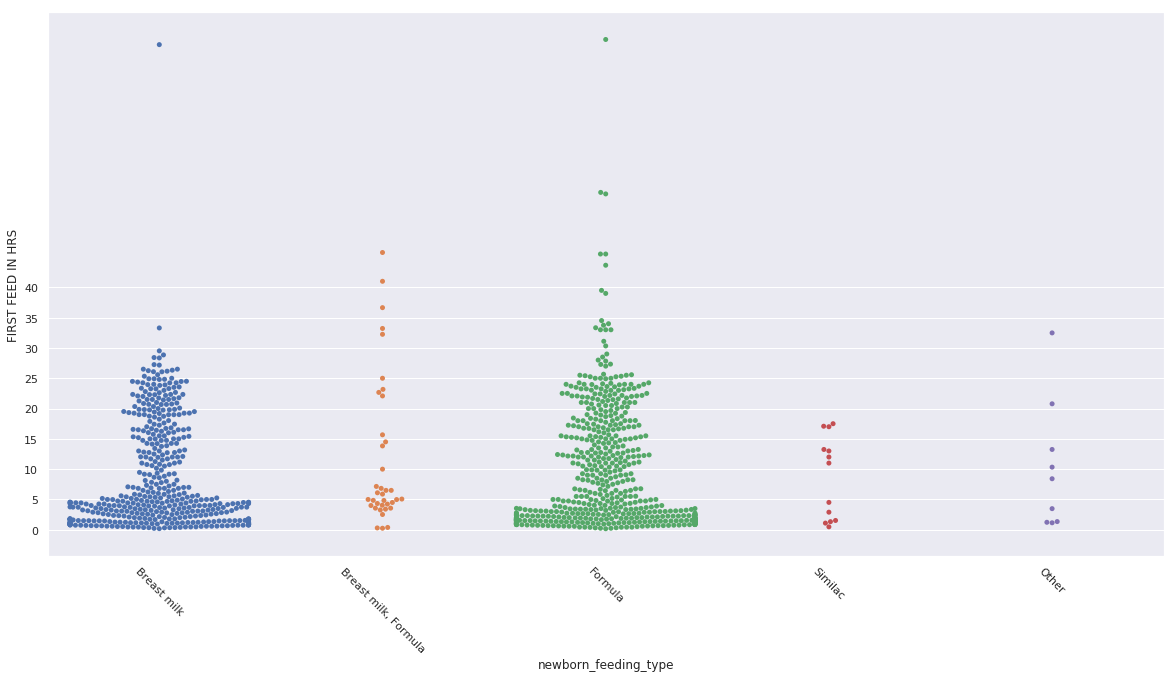

In [17]:
# Visualization using swarmplot showing patient population first feeding in hours grouped by feeding type. 
plt.figure(figsize=(20,10))
sns.swarmplot(x="newborn_feeding_type", y="birth_to_event_hrs", data=df_first_feed)
plt.yticks([0,5,10,15,20,25,30,35,40])
plt.ylabel("FIRST FEED IN HRS")
plt.xticks(rotation=-45)

plt.show()

## Initial Feeding ECDF

In [18]:
# ECDF function
def ecdf(data):

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

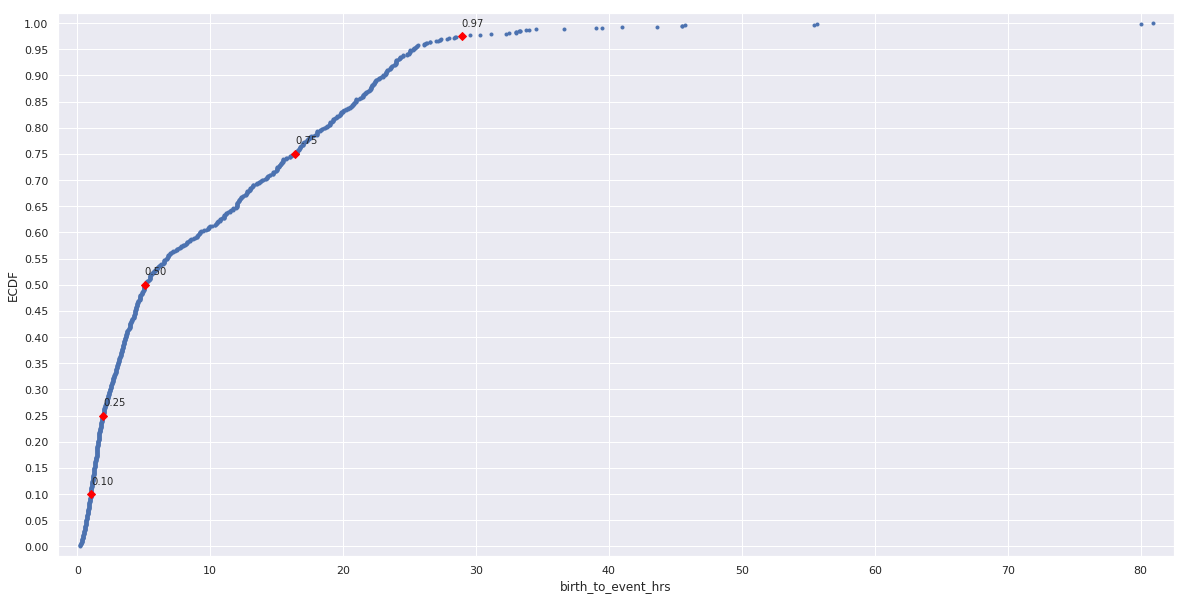

In [19]:
# Compute ECDF
x, y = ecdf(df_first_feed['birth_to_event_hrs'])

# Generate plot
plt.figure(figsize=(20,10))
plt.yticks([0,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.80,.85,.90,.95,1])
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

# Make the margins
plt.margins(0.02)

_ = plt.xlabel('birth_to_event_hrs')
_ = plt.ylabel('ECDF')


# Specify array of percentiles: percentiles
percentiles = np.array([10, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles = np.percentile(df_first_feed['birth_to_event_hrs'], percentiles)

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles, percentiles / 100, marker='D', color='red',
             linestyle='none')


# zip joins x and y coordinates in pairs
for x,y in zip(ptiles,percentiles / 100):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.show()  

The ECDF shows that in 2017, 10% of the mothers breast fed within 1 hour from the birth of the newborn.